# Am I the AHole Dataset Construction

Constructing datasets for the AITA subreddit as an exercise using AllenNLP.

In [1]:
import sys
sys.path.append('.')
sys.path.append('..')

from subreddit_frequency import load_dataframe_from_jsonl
from tqdm import tqdm
tqdm.pandas()

import seaborn as sns
from datetime import datetime
sns.set('paper')

from ipywidgets import interact
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

## Data Loading

Loads the data from sharded files, need to rebuild and concatonate.
May take up a lot of memory, so runon a computer with enough RAM.

In [5]:
submissions_df = pd.concat([
    load_dataframe_from_jsonl(a)
    for a in Path("../data").glob("RS_*Asshole.dump")
],axis=0)

93it [00:00, 15161.90it/s]
104it [00:00, 22277.09it/s]
94it [00:00, 32770.72it/s]
128it [00:00, 36671.51it/s]
0it [00:00, ?it/s]
360it [00:00, 15763.62it/s]
116it [00:00, 42753.89it/s]
104it [00:00, 34515.56it/s]
130it [00:00, 43655.69it/s]
106it [00:00, 29422.03it/s]
333it [00:00, 27925.13it/s]
110it [00:00, 32102.24it/s]
0it [00:00, ?it/s]

../data/RS_2016-04.zst_AmItheAsshole.dump
../data/RS_2016-08.zst_AmItheAsshole.dump
../data/RS_2016-06.zst_AmItheAsshole.dump
../data/RS_2016-01.zst_AmItheAsshole.dump
../data/RS_2019-09.zst_AmItheAsshole.dump
../data/RS_2017-09.bz2_AmItheAsshole.dump
../data/RS_2016-09.zst_AmItheAsshole.dump
../data/RS_2017-05.bz2_AmItheAsshole.dump
../data/RS_2017-01.bz2_AmItheAsshole.dump
../data/RS_2017-03.bz2_AmItheAsshole.dump
../data/RS_2017-11.bz2_AmItheAsshole.dump
../data/RS_2016-07.zst_AmItheAsshole.dump
../data/RS_2019-05.zst_AmItheAsshole.dump


27375it [00:00, 31432.17it/s]
154it [00:00, 18068.28it/s]
102it [00:00, 24686.61it/s]
339it [00:00, 28921.53it/s]
113it [00:00, 27907.69it/s]
5415it [00:00, 26640.99it/s]

../data/RS_2016-12.zst_AmItheAsshole.dump
../data/RS_2016-11.zst_AmItheAsshole.dump
../data/RS_2017-10.bz2_AmItheAsshole.dump
../data/RS_2017-06.bz2_AmItheAsshole.dump
../data/RS_2019-06.zst_AmItheAsshole.dump


28643it [00:01, 21486.90it/s]
136it [00:00, 35133.37it/s]
88it [00:00, 41369.51it/s]
98it [00:00, 46096.42it/s]
2244it [00:00, 22436.54it/s]

../data/RS_2017-07.bz2_AmItheAsshole.dump
../data/RS_2016-05.zst_AmItheAsshole.dump
../data/RS_2016-03.zst_AmItheAsshole.dump
../data/RS_2018-12.zst_AmItheAsshole.dump


7561it [00:00, 23697.00it/s]
104it [00:00, 30269.07it/s]
918it [00:00, 24402.80it/s]
97it [00:00, 34823.89it/s]
0it [00:00, ?it/s]

../data/RS_2017-08.bz2_AmItheAsshole.dump
../data/RS_2019-07.zst_AmItheAsshole.dump
../data/RS_2016-10.zst_AmItheAsshole.dump
../data/RS_2018-11.zst_AmItheAsshole.dump


6479it [00:00, 21614.69it/s]
2284it [00:00, 22831.31it/s]

../data/RS_2019-01.zst_AmItheAsshole.dump


11577it [00:00, 27126.95it/s]
3349it [00:00, 4932.91it/s] 

../data/RS_2019-08.zst_AmItheAsshole.dump


34476it [00:01, 22079.99it/s]
2407it [00:00, 23417.25it/s]

../data/RS_2019-04.zst_AmItheAsshole.dump


26443it [00:01, 18042.18it/s]
139it [00:00, 34318.83it/s]
2224it [00:00, 22239.12it/s]

../data/RS_2017-04.bz2_AmItheAsshole.dump
../data/RS_2019-03.zst_AmItheAsshole.dump


23976it [00:00, 30005.96it/s]
2361it [00:00, 23602.71it/s]

../data/RS_2019-02.zst_AmItheAsshole.dump


15621it [00:00, 27998.60it/s]
94it [00:00, 33674.80it/s]
115it [00:00, 24706.50it/s]

../data/RS_2017-02.bz2_AmItheAsshole.dump
../data/RS_2016-02.zst_AmItheAsshole.dump



/home/johnkeszler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [6]:
comments_df = pd.concat([
    load_dataframe_from_jsonl(a)
    for a in Path("../data").glob("RC_*Asshole.dump")
],axis=0)

2035it [00:00, 60691.49it/s]
4925it [00:00, 49244.18it/s]

../data/RC_2016-11.bz2_AmItheAsshole.dump
../data/RC_2019-05.zst_AmItheAsshole.dump


1120561it [00:28, 38889.94it/s]
1555it [00:00, 17322.58it/s]
2288it [00:00, 122274.19it/s]
1186it [00:00, 39470.95it/s]

../data/RC_2016-09.bz2_AmItheAsshole.dump
../data/RC_2016-12.bz2_AmItheAsshole.dump
../data/RC_2016-03.bz2_AmItheAsshole.dump



4782it [00:00, 47816.17it/s]

../data/RC_2019-02.zst_AmItheAsshole.dump


508604it [00:13, 37687.05it/s]
1731it [00:00, 26579.08it/s]
4884it [00:00, 48836.09it/s]

../data/RC_2017-07.bz2_AmItheAsshole.dump
../data/RC_2019-04.zst_AmItheAsshole.dump


107953it [00:02, 48405.24it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10021 characters

## Dataset Statistics

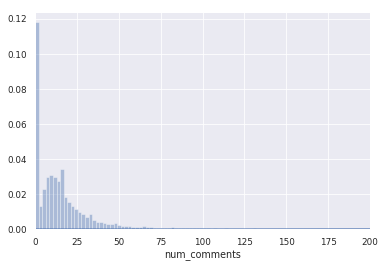

In [7]:
#print(comments_df.created_utc.conve.describe())
sns.distplot(submissions_df.num_comments,bins=5000, kde=True);
plt.xlim(0,200)
plt.show()

In [9]:
submissions_df.score.describe()

count    186326.000000
mean        101.364587
std        1051.081844
min           0.000000
25%           1.000000
50%           2.000000
75%           7.000000
max       66384.000000
Name: score, dtype: float64

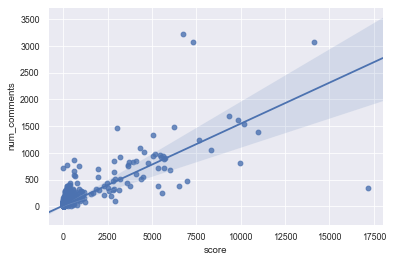

In [7]:
sns.regplot(x='score', y='num_comments', data=submissions_df)
plt.show()

Preprocess the comment to have:
* the id of the previous post that it is a comment to
* the absolute value of the score

## Helper Functions

Helper functions to:
1. Get comments from ID
2. Determine if someone is an AH

In [10]:
def get_comments_from_id(df, parent_id):
    cols = ['author_flair_text', 'stickied', 'author', 'body', 'score', 'score_abs', 'judgement']
    return df[df.prev_id == parent_id][cols]

In [11]:
def determine_AH(body):
    """Determines if poster thinks asshole or not asshole."""
    if body.startswith("YTA"):
        return "YTA"
    elif body.startswith("ESH"):
        return "ESH"
    elif body.startswith("NAH"):
        return "NAH"
    elif body.startswith("NTA"):
        return "NTA"
    else:
        return "UNK"

In [12]:
comments_df['prev_id'] = comments_df.parent_id.map(lambda x: x.split('_')[-1])
comments_df['score_abs'] = comments_df.score.map(abs)
comments_df['judgement'] = comments_df.body.map(determine_AH)
submissions_df['timestamp'] = submissions_df.created_utc.map(datetime.fromtimestamp)
submissions_df = submissions_df.sort_values('num_comments', ascending=False)

Only get the most popular titles with the highest number of comments.

In [13]:
pd.set_option('display.max_rows', 500)
good_submissions_df = submissions_df[submissions_df.num_comments > 30]

In [14]:
len(good_submissions_df)

33043

In [15]:
display(list(good_submissions_df.head().title))
display(list(good_submissions_df.head().id))

['AITA for giving my concert ticket to another girl after my friend said she only wanted to go with me as "friends"?',
 'AITA for refusing to pay back my cousin after my baby ruined her blouse?',
 'AITA for cancelling my wedding because fiancee almost got my dog killed?',
 'AITA for wanting my girlfriend to wear makeup and take care of body hair?',
 'AITA for telling a friend’s friend that he couldn’t keep the “jackpot” that he hit on my antique slot machine? (About $700)']

['c5y237', 'cw43oc', 'bmi2qj', 'cqin60', 'cm0bft']

For matching, filter by if the comment actually makes a judgement.

In [16]:
comments_df.judgement.value_counts()

UNK    6157208
NTA    1662273
YTA     822422
NAH     287302
ESH     212204
Name: judgement, dtype: int64

In [17]:
# Determine label and label_fine for each prev_id
judgement_df = comments_df[comments_df.judgement != "UNK"].reset_index()
for judge in judgement_df.judgement.unique():
    judgement_df[judge] = (judgement_df.judgement == judge).astype(int)
count_df = judgement_df.groupby(['prev_id'])[judgement_df.judgement.unique()].sum()
count_df['label_fine'] = count_df.apply(lambda x : dict(x), axis=1)
count_df['label'] = count_df[judgement_df.judgement.unique()].idxmax(axis=1)
count_df['id'] = count_df.index

In [18]:
good_submissions_df = good_submissions_df.merge(count_df[['label', 'label_fine', 'id']], left_on='id', right_on='id')

When the mode is returned, there will sometimes be ties.
So let's get rid of the ties.

In [20]:
good_submissions_df.label_fine.sample(3)

19685    {'NTA': 0, 'YTA': 10, 'NAH': 3, 'ESH': 0}
17405    {'NTA': 31, 'YTA': 0, 'NAH': 1, 'ESH': 0}
30214     {'NTA': 3, 'YTA': 3, 'NAH': 0, 'ESH': 2}
Name: label_fine, dtype: object

In [24]:
label_counts = good_submissions_df.label.value_counts()

In [26]:
label_counts / label_counts.sum()

NTA    0.569423
YTA    0.337666
NAH    0.059715
ESH    0.033197
Name: label, dtype: float64

In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
good_submissions_df[['title', 'label']].head()
print(good_submissions_df[good_submissions_df.label == 'UNK'].title)

Series([], Name: title, dtype: object)


In [27]:
comments_df.head()

,all_awardings,approved_at_utc,archived,associated_award,author,author_cakeday,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,banned_at_utc,body,can_gild,can_mod_post,collapsed,collapsed_because_crowd_control,collapsed_reason,controversiality,created_utc,distinguished,edited,gilded,gildings,id,is_submitter,link_id,locked,mod_note,mod_reason_by,mod_reason_title,no_follow,parent_id,permalink,quarantined,removal_reason,retrieved_on,score,send_replies,steward_reports,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,ups,prev_id,score_abs,judgement
0,NaN,NaN,NaN,NaN,shadowwolfsl,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I try. I feel terrible because everyone else i...,NaN,NaN,NaN,NaN,NaN,0,1477959164,None,False,0,NaN,d9g5lrn,NaN,t3_5acgc9,NaN,NaN,NaN,NaN,NaN,t1_d9fuknh,NaN,NaN,NaN,1481097920,1,NaN,NaN,False,AmItheAsshole,t5_2xhvq,NaN,NaN,NaN,NaN,d9fuknh,1,UNK
1,NaN,NaN,NaN,NaN,neverr_ben_better,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tbh, you're all kind of petty.\n\nYour sister ...",NaN,NaN,NaN,NaN,NaN,0,1477959600,None,1477959879,0,NaN,d9g5xd3,NaN,t3_5aeb1u,NaN,NaN,NaN,NaN,NaN,t3_5aeb1u,NaN,NaN,NaN,1481098097,6,NaN,NaN,False,AmItheAsshole,t5_2xhvq,NaN,NaN,NaN,NaN,5aeb1u,6,UNK
2,NaN,NaN,NaN,NaN,[deleted],NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,0,1477959844,None,False,0,NaN,d9g63tr,NaN,t3_5aeb1u,NaN,NaN,NaN,NaN,NaN,t1_d9g5xd3,NaN,NaN,NaN,1481098183,2,NaN,NaN,False,AmItheAsshole,t5_2xhvq,NaN,NaN,NaN,NaN,d9g5xd3,2,UNK
3,NaN,NaN,NaN,NaN,Celera314,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,How do you know he waited to contact you about...,NaN,NaN,NaN,NaN,NaN,0,1477960010,None,False,0,NaN,d9g686c,NaN,t3_5afndb,NaN,NaN,NaN,NaN,NaN,t1_d9g3bzm,NaN,NaN,NaN,1481098245,5,NaN,NaN,False,AmItheAsshole,t5_2xhvq,NaN,NaN,NaN,NaN,d9g3bzm,5,UNK
4,NaN,NaN,NaN,NaN,Ce-Jay,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Because he had to clock back in from his break...,NaN,NaN,NaN,NaN,NaN,0,1477960291,None,False,0,NaN,d9g6fnl,NaN,t3_5afndb,NaN,NaN,NaN,NaN,NaN,t1_d9g686c,NaN,NaN,NaN,1481098374,5,NaN,NaN,False,AmItheAsshole,t5_2xhvq,NaN,NaN,NaN,NaN,d9g686c,5,UNK


[]

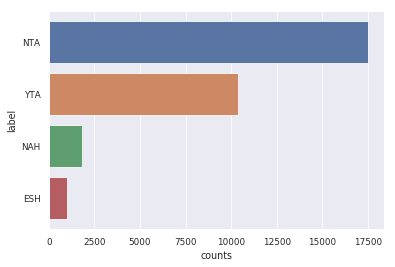

In [28]:
label_counts = good_submissions_df.label.value_counts().to_frame()
label_counts.columns = ['counts']
label_counts['label'] = label_counts.index
sns.barplot(y='label', x='counts', data=label_counts)
plt.plot()

## Train Test Split

Eliminates the posts that have an unknown label, and splits our huge dataset into a train/val/test split.

In [29]:
dataset_df = good_submissions_df[good_submissions_df.label != 'UNK']

In [30]:
test_dataset_df = dataset_df.sample(frac=0.1)

In [31]:
traindev_dataset_df = dataset_df.drop(test_dataset_df.index)

In [32]:
train_dataset_df = traindev_dataset_df.sample(frac=0.8)
dev_dataset_df = traindev_dataset_df.drop(train_dataset_df.index)

In [33]:
dev_dataset_df.to_pickle('../aita/aita-dev.pkl')
train_dataset_df.to_pickle('../aita/aita-train.pkl')
test_dataset_df.to_pickle('../aita/aita-test.pkl')

In [34]:
test_dataset_df.label.value_counts() / test_dataset_df.label.value_counts().sum()

NTA    0.590554
YTA    0.326384
NAH    0.054723
ESH    0.028339
Name: label, dtype: float64

In [36]:
dev_dataset_df.label.value_counts() / dev_dataset_df.label.value_counts().sum()

NTA    0.561629
YTA    0.344796
NAH    0.059548
ESH    0.034027
Name: label, dtype: float64